In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Principal Component Analysis

This notebook will demonstrate performing principal component analysis using eigenvectors of the covariance matrix as well as SVD.

First, let's set up a mock example. Let's say that we have 3 sensors that observe the location of a ball attached to a spring. We are going to use PCA to determine the underlying dynamics of this system.

<ipython-input-2-54d098f94220>:1: RuntimeWarning: covariance is not positive-semidefinite.
  x_a = np.random.multivariate_normal([-1, 1], [[0.9, 0.5], [0.05, 0.05]], 100)
<ipython-input-2-54d098f94220>:2: RuntimeWarning: covariance is not positive-semidefinite.
  x_b = np.random.multivariate_normal([-1, 1], [[-0.9, 0.5], [-0.1, 0]], 100)
<ipython-input-2-54d098f94220>:3: RuntimeWarning: covariance is not positive-semidefinite.
  x_c = np.random.multivariate_normal([-1, 1], [[0, 1], [0.03, 0]], 100)


<IPython.core.display.Javascript object>


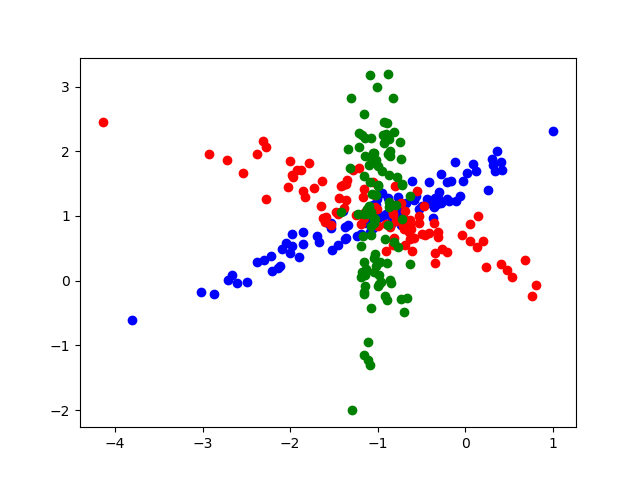

In [2]:
x_a = np.random.multivariate_normal([-1, 1], [[0.9, 0.5], [0.05, 0.05]], 100)
x_b = np.random.multivariate_normal([-1, 1], [[-0.9, 0.5], [-0.1, 0]], 100)
x_c = np.random.multivariate_normal([-1, 1], [[0, 1], [0.03, 0]], 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_a[:, 0], x_a[:, 1], c='b')
ax.scatter(x_b[:, 0], x_b[:, 1], c='r')
ax.scatter(x_c[:, 0], x_c[:, 1], c='g')

# PCA via Eigenvectors of the Covariance Matrix

With PCA, we are attempting to find a change-of-basis matrix $P$ such that our original data $X$ is transformed into a new representation $Y$. We want the new representation $Y$ to reduce the redunancy among the features. That is, find a $P$ such that $S_{Y} = \frac{1}{n-1}YY^{T}$ will be diagonalized.


We start by constructing a covariance matrix between the features that we have observed: $S_{X} = \frac{1}{n-1}XX^{T}$.


So, how do we find this? We start by noting that
\begin{align*}
S_{Y} &= \frac{1}{n-1}YY^{T}\\
&= \frac{1}{n-1}(PX)(PX)^{T}\\
&= \frac{1}{n-1}PXX^{T}P^{T}\\
&= \frac{1}{n-1}P(XX^{T})P^{T}\\
&= \frac{1}{n-1}PAP^{T}
\end{align*}


Here, $A = XX^{T}$ is symmetric. We also learned about a useful factorization of symmetric matrices: $A = EDE^{T}$, where $D$ is a diagonal matrix representing the eigenvalues of $A$ and $E$ represents the corresponding eigenvectors.


Getting back to our original $P$. We want $P$ such that each row is an eigenvector of $A$. This is simply $E^{T}$ from the factorization above! Thus, $P = E^{T}$. We can now substitute $A = P^{T}DP$ into $S_{Y} = \frac{1}{n-1}PAP^{T}$:

\begin{align*}
S_{Y} &= \frac{1}{n-1}PAP^{T}\\
&= \frac{1}{n-1}P(P^{T}DP)P^{T}\\
&= \frac{1}{n-1}(PP^{T})D(PP^{T})\\
&= \frac{1}{n-1}(PP^{-1})D(PP^{-1})\\
&= \frac{1}{n-1}D\\
\end{align*}


We are left with $P$, the principal components of $X$, and $S_{Y}$, the variance of $X$ along the rows of $P$.

(6, 100)
(6,)


<IPython.core.display.Javascript object>


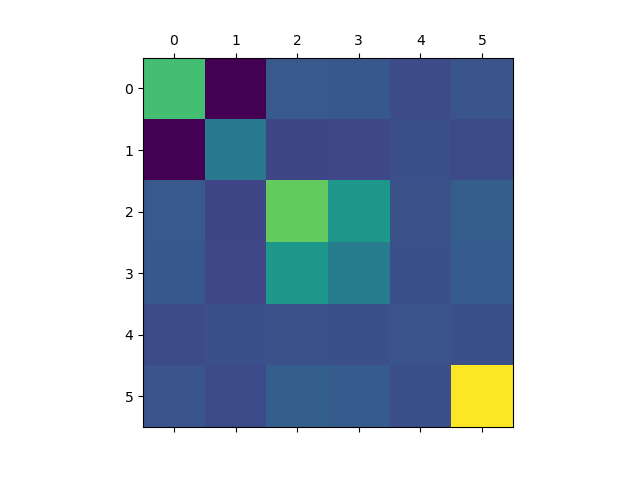

In [6]:
# Construct the matrix X out of our 3 sensors
X = np.vstack([x_b.T, x_a.T, x_c.T])
num_features, num_samples = X.shape

# Subtract the mean from each dimension
X_mean = np.mean(X, 1)
X = X - X_mean[:, np.newaxis]

# Calculate the covariance
X_cov = 1 / (num_samples - 1) * X @ X.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(X_cov)

# Compute the eigendecomposition
D, P = np.linalg.eig(X_cov)

# Dimensionality Reduction

Clearly we do not need 6 dimensions to describe the underlying dynamics of the given system. The eigenvectors corresponding the largest eigenvalues capture the largest variance of our dataset.

We can select only a few of these eigenvectors and project our data to a lower dimension. In this case, we will transform each 6D feature vector back to 2D using the 2 eigenvectors that best capture the variance of the data.

In [10]:
# Sort eigenvalues and eigenvectors in decreasing order
sort_idx = D.argsort()[::-1]
D = D[sort_idx]
P = P[:,sort_idx]

n_comps = 2 # number of eigenvectors to use
W = P[:n_comps]

(6, 100)


# Visualizing the projected space

Now that we've computed the principal components of our original data. We can see what they look like when projected to the new space.


This will qualitatively provide the answer to the question of what is the most salient feature in our data?

(2, 100)


<IPython.core.display.Javascript object>


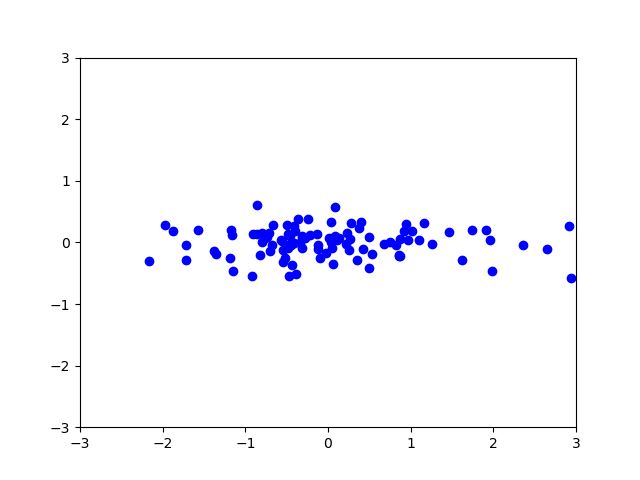

(-3.0, 3.0)

In [12]:
# Project the original samples using the principal components corresponding to the highest variance.
X_proj = W @ X
print(X_proj.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_proj[0, :], X_proj[1, :], c='b')
ax.arrow(0, 0, P[])
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])